In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [23]:
df = pd.read_csv('http://mcobaya.web.fc2.com/small_jgss.csv')

szincomx:その仕事に限った年収

op5happe, op5happz: 幸福度(1が幸せ)

xjobyr: 就労年数(888:999->NA)

tpjobp: 仕事の種類(7,8,9->NA)

resinc: 年収

In [24]:
df.head()

,Unnamed: 0,szincomx,sexa,ageb,op5happe,xjobyr,tpjobp,op5happz,resinc,tspjobp
0,1,23,2,85,8,888,8,1,NaN,8
1,2,23,2,85,2,888,8,8,NaN,8
2,3,23,1,83,3,888,8,8,NaN,8
3,4,23,2,83,3,888,8,8,NaN,8
4,5,23,2,82,8,888,8,1,NaN,8


In [25]:
df['op5happe'].unique()

array([8, 2, 3, 1, 4, 5, 9], dtype=int64)

In [28]:
df['op5happe'] = df['op5happe'].replace([8, 9], np.nan)

In [29]:
df['op5happe'].unique()

array([nan,  2.,  3.,  1.,  4.,  5.])

In [36]:
df_f = df[df['sexa'] == 2]
df_m = df[df['sexa'] == 1]

In [37]:
df_ftable = df_f['op5happe'].value_counts().rename_axis('happiness').reset_index(name='value')
df_mtable = df_m['op5happe'].value_counts().rename_axis('happiness').reset_index(name='value')

In [38]:
df_ftable

,happiness,value
0,2.0,556
1,3.0,412
2,1.0,263
3,4.0,91
4,5.0,13


In [39]:
df_mtable

,happiness,value
0,2.0,448
1,3.0,403
2,1.0,198
3,4.0,91
4,5.0,12


In [40]:
df5 = pd.DataFrame([[140,150],[160,180]])
df5

,0,1
0,140,150
1,160,180


In [63]:
df_ftable.transpose()


,0,1,2,3,4
happiness,2.0,3.0,1.0,4.0,5.0
value,556.0,412.0,263.0,91.0,13.0


In [45]:
df_merge = pd.merge(df_ftable, df_mtable, on='happiness')

In [46]:
df_merge

,happiness,value_x,value_y
0,2.0,556,448
1,3.0,412,403
2,1.0,263,198
3,4.0,91,91
4,5.0,13,12


In [58]:
df_main = df_merge.iloc[:,1:].transpose()

In [59]:
columns = {0:2,1:3,2:1,3:4,4:5}
df_main = df_main.rename(columns=columns)
df_main = df_main.rename(index={'value_x':'female', 'value_y':'male'})

In [60]:
df_main

,2,3,1,4,5
value_x,556,412,263,91,13
value_y,448,403,198,91,12


In [61]:
df_main = df_main.reindex(columns=[1,2,3,4,5])

In [66]:
df_main
#1335

,1,2,3,4,5
female,263,556,412,91,13
male,198,448,403,91,12


In [68]:
x2, p, dof, e = st.chi2_contingency(df_main,correction=False)
print(f'p値 　　　= {p :.3f}')
print(f'カイ2乗値 = {x2:.2f}')
print(f'自由度　  = {dof}')

p値 　　　= 0.112
カイ2乗値 = 7.50
自由度　  = 4


In [187]:
df_pro = df_main.apply(lambda x:x/sum(x)*100,axis=1)

In [188]:
x2, p, dof, e = st.chi2_contingency(df_pro,correction=False)
print(f'p値 　　　= {p :.3f}')
print(f'カイ2乗値 = {x2:.2f}')
print(f'自由度　  = {dof}')
print(e)

p値 　　　= 0.962
カイ2乗値 = 0.61
自由度　  = 4
[[18.44393727 40.26841448 32.92203105  7.35789248  1.00772472]
 [18.44393727 40.26841448 32.92203105  7.35789248  1.00772472]]


In [136]:
df_pro

,1,2,3,4,5
female,19.700375,41.647940,30.861423,6.816479,0.973783
male,17.187500,38.888889,34.982639,7.899306,1.041667


In [137]:
df['ageb'].unique()

array([85, 83, 82, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67,
       66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50,
       49, 48, 47, 46, 45, 44, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 23, 22, 21, 20, 43, 24, 84, 81, 87, 86,
       88, 89], dtype=int64)

In [152]:
df_age = df.query('30 <= ageb < 55')
df_hist = df.query('sexa == 2')

In [153]:
df_hist['szincomx'].unique()
#1,23,20,21,99は消す

array([23, 21,  5,  2, 10, 20,  7,  3,  4,  6, 11,  8, 99, 14,  9, 12, 13,
        1, 15], dtype=int64)

In [170]:
df_hist = df.query('szincomx not in [1,99, 23, 21, 20]')

(array([537., 310., 670., 284., 366., 192.,  60.,  49.,  11.,   9.]),
 array([ 2. ,  3.7,  5.4,  7.1,  8.8, 10.5, 12.2, 13.9, 15.6, 17.3, 19. ]),
 <a list of 10 Patch objects>)

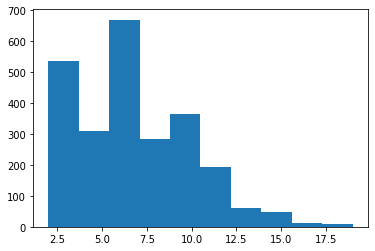

In [171]:
plt.hist(df_hist['szincomx'])

C:\Users\daisuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


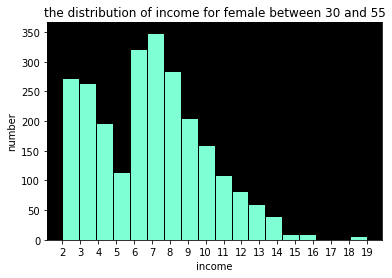

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor("black")
ax.hist(df_hist['szincomx'], bins=18, color='aquamarine', edgecolor='black')
ax.set_title('the distribution of income for female between 30 and 55')
ax.set_xlabel('income')
ax.set_ylabel('number')
ax.set_xticks([i for i in range(2,20)])
fig.savefig("the distribution of income for female between 30 and 55.png")
fig.show()